In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv("Iris.csv")
df = iris.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


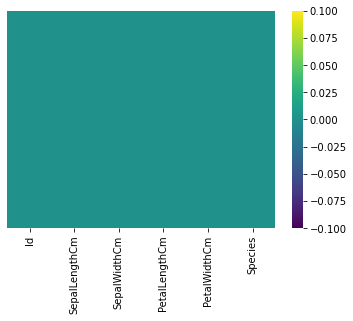

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


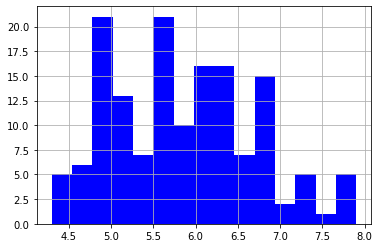

In [5]:
df["SepalLengthCm"].hist(bins=15,color="blue")

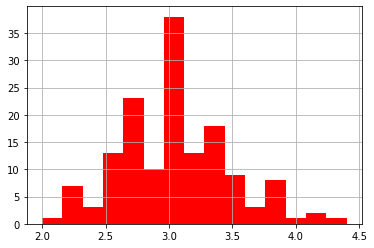

In [6]:
df["SepalWidthCm"].hist(bins=15,color="red")

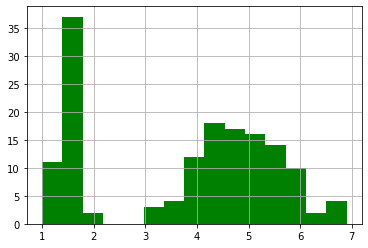

In [7]:
df["PetalLengthCm"].hist(bins=15,color="green")

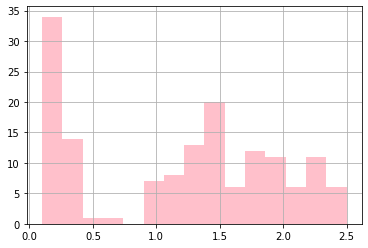

In [8]:
df["PetalWidthCm"].hist(bins=15,color="pink")

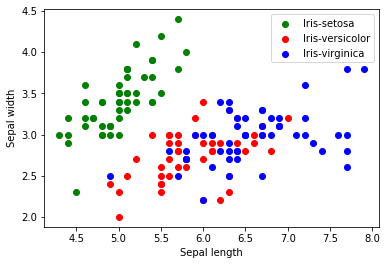

In [9]:
#scatter plots to find relation between two columns at a time
colors =["green","red","blue"]
species =["Iris-setosa","Iris-versicolor","Iris-virginica"]
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

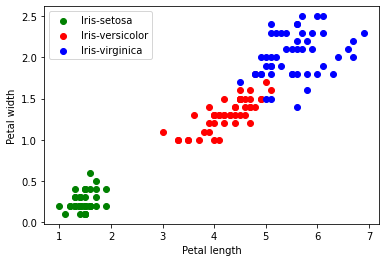

In [10]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

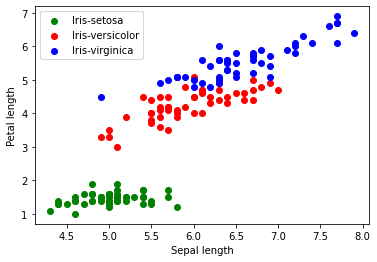

In [11]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()

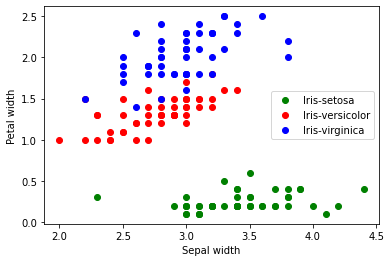

In [12]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalWidthCm"],x["PetalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()

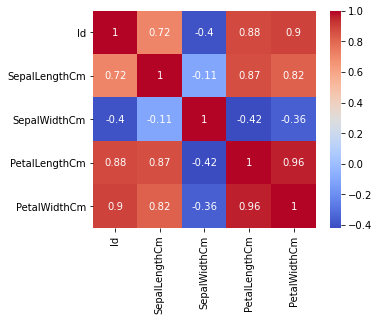

In [13]:
#correlation to see how muchcolumns are related to each other
correlation = df.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation,annot=True,ax=ax,cmap="coolwarm")

In [14]:
# Label encoding so that machine can understand it clearly
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [15]:
from sklearn.model_selection import train_test_split as split
y=df["Species"]
df=df.drop("Species",axis=1)
x=df
x_train,x_test,y_train,y_test = split(x,y,test_size=0.30)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_prediction = model.predict(x_test)

In [17]:
#Analyzing efficiency of model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_matrix = confusion_matrix(y_test,y_prediction)
accuracy = accuracy_score(y_test,y_prediction)
print("confusion matrix")
print(accuracy_matrix)
print("accuracy =",accuracy)

confusion matrix
[[18  0  0]
 [ 0 17  0]
 [ 0  0 10]]
accuracy = 1.0


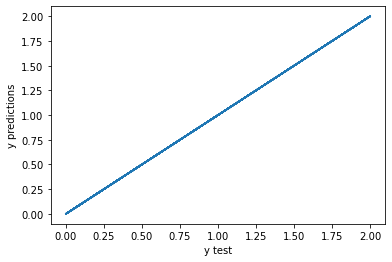

In [18]:
plt.plot(y_test,y_prediction)
plt.xlabel("y test")
plt.ylabel("y predictions")
plt.show()